### Out-of-plane Current Density and Magentic Field Lines


In [1]:
import os as os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sdf_helper as sh 
import matplotlib.colors as mcolors 
from matplotlib.ticker import MaxNLocator 
import glob as glob
%matplotlib inline 
from mpl_toolkits.axes_grid1 import make_axes_locatable 

/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
hard_drive = '/volumes/My Passport/MMath Project/sim_5_FD'
os.chdir(hard_drive)


data_dir = hard_drive + '/Data/' 
data = sh.getdata(0,data_dir, verbose=False) 
t = data.Last_dump_time_requested.data 
print(t)

0.0


#### Global Matplotlib Formatting

In [3]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 15  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 15 

### Main plot

In [4]:
def current_mag_field(d, data_dir): 
    '''Plots the out-of-plane current density and magnetic field lines at user specified date file'''

    data = sh.getdata(d, data_dir, verbose=False) 

    t = data.Last_dump_time_requested.data 
    
    # Plot current density
    g = data.Grid_Grid 
    xb = g.data[0] 
    yb = g.data[1] 
    
    current = data.Current_Jz

    fig, ax = plt.subplots(figsize=(14,8)) 
    
    X, Y = np.meshgrid(xb, yb, indexing='ij') 
    pcm = plt.pcolormesh(X, Y, current.data, cmap='magma') 
    #pcm = plt.pcolormesh(X, -Y, current.data,cmap='magma')  # Uncomment if half-domain simulated  
    
    # Plot magentic field lines
    g = data.Grid_Grid_mid 
    xc = g.data[0] 
    yc = g.data[1] 
    X, Y = np.meshgrid(xc, yc) 
    
    Bxc = data.Magnetic_Field_Bx_centred
    Byc = data.Magnetic_Field_By_centred
    
    # seed_points = np.array([[0,0,0,0], [0.015, 0.025, 0.035, 0.045]]) # Uncomment if specific starting points required 
    mf1 = ax.streamplot(X,Y,np.transpose(Bxc.data), np.transpose(Byc.data), color='white', minlength=0.1, density=1) # Adjust density and min length if zooming in 
    #mf1 = ax.streamplot(X,-Y,np.transpose(Bxc.data), np.transpose(Byc.data), color='white') 
    
    
    # Format plot
    cbar = fig.colorbar(pcm, pad=0.01)
    cbar.set_label(r'Current Density $J_y$', size=20)
    
    # Must specify domain to plot since streamplot adds dimension
    plt.ylim(-0.5, 0.5)
    plt.xlim(-0.5, 0.5)
    
    plt.xlabel(r'$x$', size=25)
    plt.ylabel(r'$z$', size=25)
    
    plt.title(r'Current density $J_y$ and magnetic field lines at time $t$ = '+f'{t}', size=25)
    print(t)
    plt.show()
    
    return fig

0.04


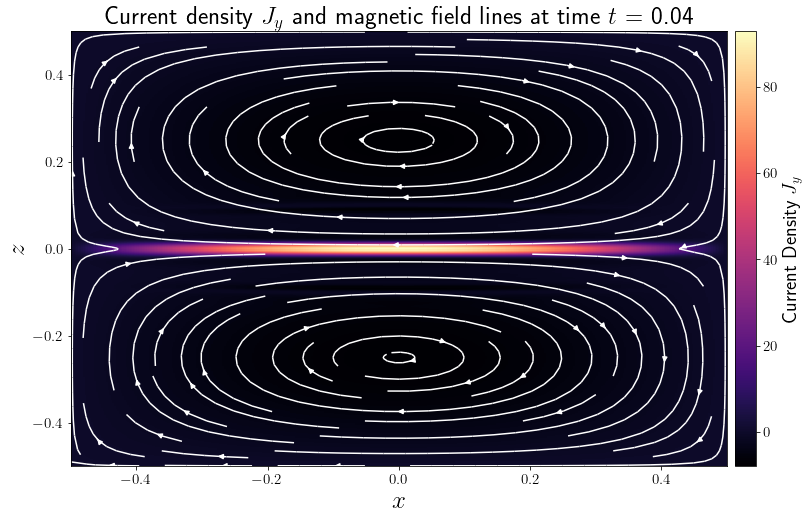

In [51]:
fig = current_mag_field(2, data_dir)
fig.savefig('sweet_parker_geom_FD.png')

### Multiple subplots


In [9]:
def current_mag_field_lines_mult(d_values, data_dir):
    '''Plots multiple subplots of current density and magnetic field lines at array of input times'''
    # Initialise lists to store the min and max current values across all datasets
    current_min = []
    current_max = []
    
    # Pre-fetch data to determine global min and max for normalization
    for d in d_values:
        data = sh.getdata(d, data_dir, verbose=False)
        current = data.Current_Jz.data
        current_min.append(current.min())
        current_max.append(current.max())
    
    # Determine global current min and max
    global_min = min(current_min)
    global_max = max(current_max)
    norm = mcolors.PowerNorm(gamma=1.9, vmin=global_min, vmax=global_max) 
    
    letters = ['(a)', '(b)', '(c)', '(d)']
    
    # Setup a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
    
    for index, (d, ax) in enumerate(zip(d_values, axs.ravel())):
        
        data = sh.getdata(d, data_dir, verbose=False)
        
        # Plot current desity 
        g = data.Grid_Grid
        xb = g.data[0]
        yb = g.data[1]
        current = data.Current_Jz.data

        X, Y = np.meshgrid(xb, yb, indexing='ij')
        pcm = ax.pcolormesh(X, Y, current, norm=norm, cmap='magma')
        
        # Plot magentic field lines
        g_mid = data.Grid_Grid_mid
        xc = g_mid.data[0]
        yc = g_mid.data[1]
        X, Y = np.meshgrid(xc, yc)
        
        Bxc = data.Magnetic_Field_Bx_centred.data
        Byc = data.Magnetic_Field_By_centred.data
        
        ax.streamplot(X, Y, np.transpose(Bxc), np.transpose(Byc), color='white', minlength=0.0001, density=2)
        
        # Plot time on graph explicitly
        t = data.Last_dump_time_requested.data
        #print(t)

        #ax.text(0.01, 0.98, r'$t=$'+f'{np.round(t,2)}', color='#F0E442',alpha=1, size=15, transform=ax.transAxes, verticalalignment='top') # Alternative time placement 

        ax.set_ylim(-0.1, 0.1)
        ax.set_xlim(-0.2, 0.2)
        
        ax.set_title(letters[index]+ r' $t=$' + f' {np.round(t,2)}', size=18)
        # Use MaxNLocator to limit the number of ticks
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
        
        # Adjusting the ticks 
        if index < 2:  # Top two plots
            ax.set_xticklabels([])
        if index % 2 != 0:  # Right two plots
            ax.set_yticklabels([])
            
            
         
    axs[1, 1].set_xlabel('$x$', size=25)
    axs[1, 0].set_xlabel('$x$', size=25)
    axs[0, 0].set_ylabel('$z$', size=25)
    axs[1, 0].set_ylabel('$z$', size=25)
    axs[1, 0].tick_params(left=True, labelleft=True, bottom=True, labelbottom=True)
        
   
    # Place a color bar at the right-hand side of the figure
    cbar=fig.colorbar(pcm, ax=axs,norm=norm, orientation='vertical', pad=0.02, aspect=30)
    tick_locations = np.linspace(global_min, global_max, num=5)  # Example with 5 ticks
    cbar.set_ticks(tick_locations)
    # Set custom labels for each tick
    cbar.set_ticklabels([f"{tick:.0f}" for tick in tick_locations])
    cbar.set_label(r' Current Density $J_y$', size=20)
    
    fig.suptitle(r'Current density and magnetic field lines at various times in $z \in [-0.1,0.1]$, $x \in [-0.2, 0.2]$', size=20)
    
    return fig

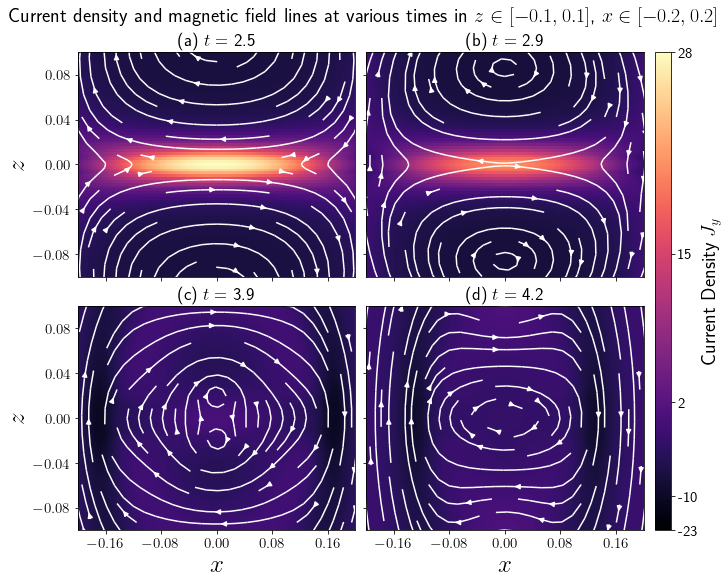

In [10]:
fig = current_mag_field_lines_mult([125,145,195,210], data_dir)
#fig.savefig('sweet_parker_geom_closeup.png')

### Full domain plot

In [64]:
def current_mag_field_lines_mult_fd(d_values, data_dir):
    '''Plots multiple subplots of current density and magnetic field lines at array of input times'''
    # Initialise lists to store the min and max current values across all datasets
    current_min = []
    current_max = []

    # Pre-fetch data to determine global min and max for normalization
    for d in d_values:
        data = sh.getdata(d, data_dir, verbose=False)
        current = data.Current_Jz.data
        current_min.append(current.min())
        current_max.append(current.max())

    # Determine global current min and max
    global_min = min(current_min)
    global_max = max(current_max)
    norm = mcolors.PowerNorm(gamma=1.9, vmin=global_min, vmax=global_max) 

    letters = ['(a)', '(b)', '(c)', '(d)']

    # Setup a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

    for index, (d, ax) in enumerate(zip(d_values, axs.ravel())):

        data = sh.getdata(d, data_dir, verbose=False)

        # Plot current desity 
        g = data.Grid_Grid
        xb = g.data[0]
        yb = g.data[1]
        current = data.Current_Jz.data

        X, Y = np.meshgrid(xb, yb, indexing='ij')
        pcm = ax.pcolormesh(X, Y, current, norm=norm, cmap='magma')

        # Plot magentic field lines
        g_mid = data.Grid_Grid_mid
        xc = g_mid.data[0]
        yc = g_mid.data[1]
        X, Y = np.meshgrid(xc, yc)

        Bxc = data.Magnetic_Field_Bx_centred.data
        Byc = data.Magnetic_Field_By_centred.data

        ax.streamplot(X, Y, np.transpose(Bxc), np.transpose(Byc), color='white', minlength=0.1, density=1)

        # Plot time on graph explicitly
        t = data.Last_dump_time_requested.data
        #print(t)

        #ax.text(0.01, 0.98, r'$t=$'+f'{np.round(t,2)}', color='#F0E442',alpha=1, size=15, transform=ax.transAxes, verticalalignment='top') # Alternative time placement 

        ax.set_ylim(-0.5, 0.5)
        ax.set_xlim(-0.5, 0.5)

        ax.set_title(letters[index]+ r' $t=$' + f' {np.round(t,2)}', size=18)
        # Use MaxNLocator to limit the number of ticks
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))

        # Adjusting the ticks 
        if index < 2:  # Top two plots
            ax.set_xticklabels([])
        if index % 2 != 0:  # Right two plots
            ax.set_yticklabels([])



    axs[1, 1].set_xlabel('$x$', size=20)
    axs[1, 0].set_xlabel('$x$', size=20)
    axs[0, 0].set_ylabel('$z$', size=20)
    axs[1, 0].set_ylabel('$z$', size=20)
    axs[1, 0].tick_params(left=True, labelleft=True, bottom=True, labelbottom=True)


    # Place a color bar at the right-hand side of the figure
    cbar=fig.colorbar(pcm, ax=axs,norm=norm, orientation='vertical', pad=0.02, aspect=30)
    tick_locations = np.linspace(global_min, global_max, num=5)  # Example with 5 ticks
    cbar.set_ticks(tick_locations)
    # Set custom labels for each tick
    cbar.set_ticklabels([f"{tick:.0f}" for tick in tick_locations])
    cbar.set_label(r' Current Density $J_y$', size=20)

    fig.suptitle(r'Current density and magnetic field lines at various times in $x,z \in [-0.5,0.5]$', size=20)
    
    return fig

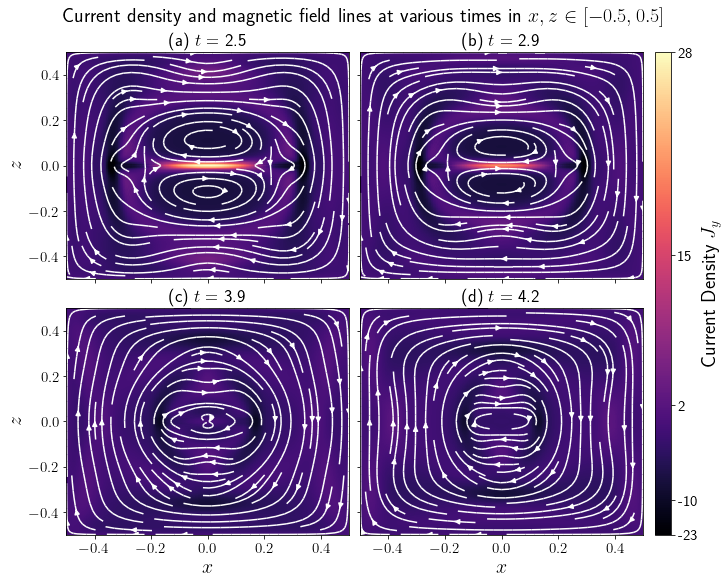

In [65]:
fig = current_mag_field_lines_mult_fd([125,145,195,210], data_dir)
#fig.savefig('sweet_parker_geom_multi_global.png')